In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w

np.random.seed(42)

In [47]:
df = w.get_telco_data()

csv file found and read


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   partner                                7043 non-null   object 
 3   dependents                             7043 non-null   object 
 4   tenure                                 7043 non-null   int64  
 5   phone_service                          7043 non-null   object 
 6   multiple_lines                         7043 non-null   object 
 7   internet_service_type                  7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [49]:
df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
internet_service_type_id,1,1,2,2,2
internet_service_type,DSL,DSL,Fiber optic,Fiber optic,Fiber optic


In [50]:
df = w.prep_telco(df) # save prep_telco_for_model for later; run on train/validate/test to prep for modeling

In [51]:
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
internet_service_type,DSL,DSL,Fiber optic,Fiber optic,Fiber optic
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [39]:
target = 'churn'
train, validate, test = w.split_function(df, target)

Prepared df: (7043, 47)

Train: (4225, 47)
Validate: (1409, 47)
Test: (1409, 47)


In [41]:
def get_telco_ne_df(df_telco):
    # ne is short for no_encoding. removing the encoded columns will just make it a little easier to look at
    cols = np.array(df_telco.columns[0:20])
    return df_telco[cols]

In [42]:
ne_train = get_telco_ne_df(train)
ne_train.head().T

,2332,5275,6429,89,6412
gender,Male,Male,Male,Female,Female
senior_citizen,0,0,0,1,0
partner,No,No,No,No,No
dependents,No,No,No,No,No
tenure,12,1,59,27,54
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,Yes,Yes,Yes,Yes,Yes
internet_service_type,Fiber optic,DSL,DSL,Fiber optic,Fiber optic
online_security,No,No,No,No,No
online_backup,No,No,No,Yes,Yes


# Explore - Hypothesize/Visualize/Analyze (w/ stats)/Summarize

## Hypothesis: Is there a relationship between monthly charges and churn?

## Visualize - Actually, I'm going to look at all the categorical variables and all the numeric variables and visualize them just to see.

In [43]:
# separate columns by categorical and numeric
col_cats = []
num_cats = []

for col in ne_train.columns:
    if ne_train[col].dtype == 'O':
        col_cats.append(col)
    else:
        if len(ne_train[col].unique()) < 4: # make anything with less than 4 unique values a categorical variable
            col_cats.append(col)
        else:
            num_cats.append(col)
print("col_cats = ")
print(col_cats)
print("num_cats")
print(num_cats)

col_cats = 
['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service_type', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'paperless_billing', 'payment_type', 'churn']
num_cats
['tenure', 'monthly_charges', 'total_charges']


### categorical variables

GENDER
Male      2129
Female    2096
Name: gender, dtype: int64
Male      0.503905
Female    0.496095
Name: gender, dtype: float64


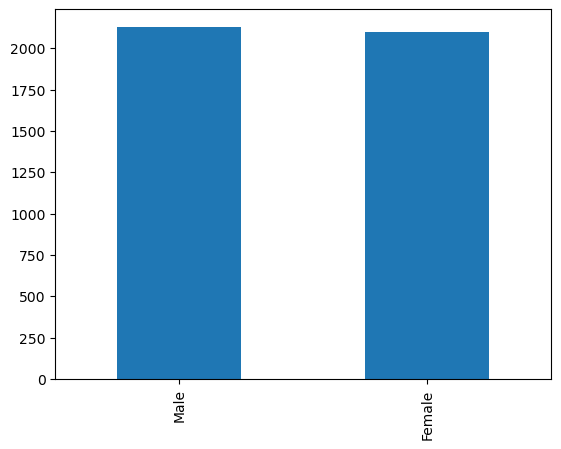


SENIOR_CITIZEN
0    3553
1     672
Name: senior_citizen, dtype: int64
0    0.840947
1    0.159053
Name: senior_citizen, dtype: float64


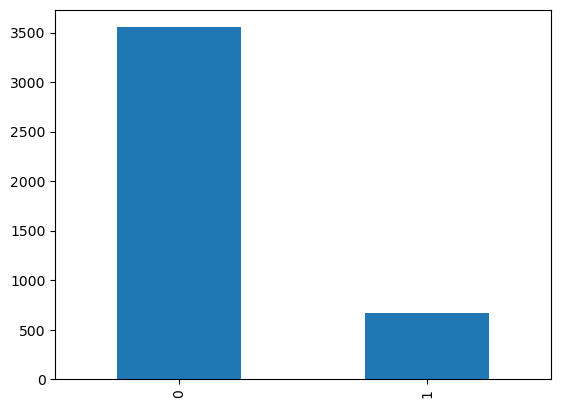


PARTNER
No     2199
Yes    2026
Name: partner, dtype: int64
No     0.520473
Yes    0.479527
Name: partner, dtype: float64


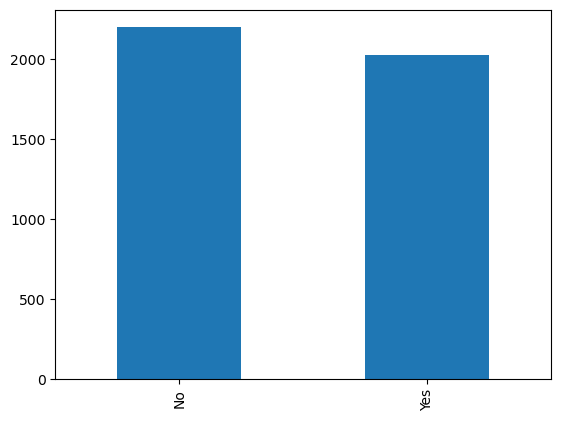


DEPENDENTS
No     2934
Yes    1291
Name: dependents, dtype: int64
No     0.694438
Yes    0.305562
Name: dependents, dtype: float64


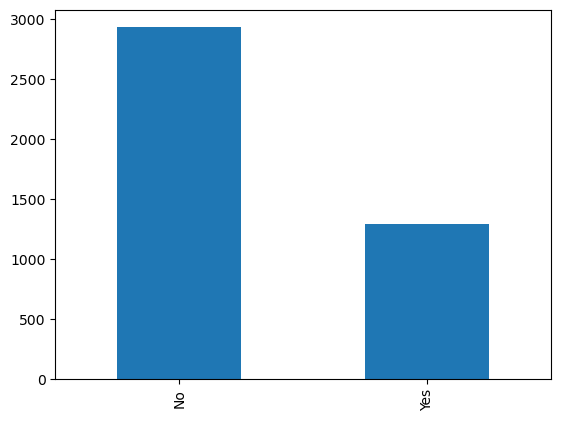


PHONE_SERVICE
Yes    3833
No      392
Name: phone_service, dtype: int64
Yes    0.907219
No     0.092781
Name: phone_service, dtype: float64


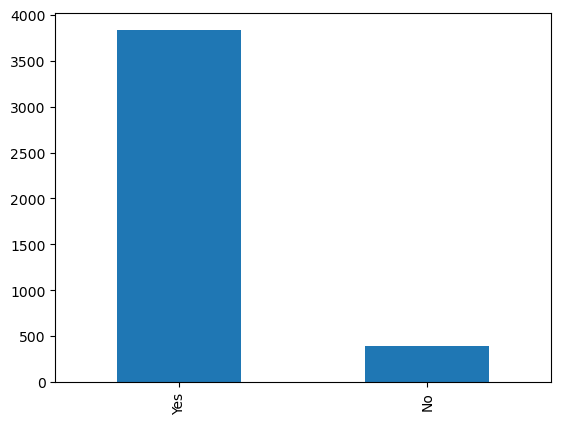


MULTIPLE_LINES
No                  2046
Yes                 1787
No phone service     392
Name: multiple_lines, dtype: int64
No                  0.484260
Yes                 0.422959
No phone service    0.092781
Name: multiple_lines, dtype: float64


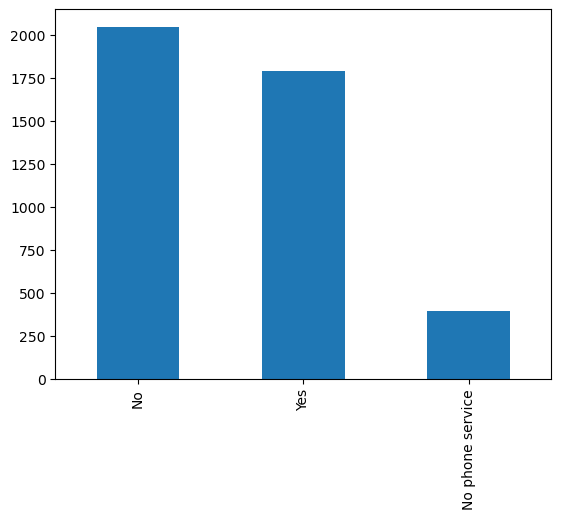


INTERNET_SERVICE_TYPE
Fiber optic    1882
DSL            1437
None            906
Name: internet_service_type, dtype: int64
Fiber optic    0.445444
DSL            0.340118
None           0.214438
Name: internet_service_type, dtype: float64


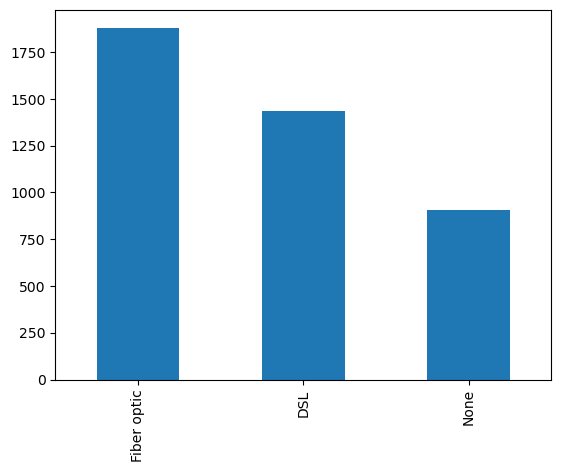


ONLINE_SECURITY
No                     2106
Yes                    1213
No internet service     906
Name: online_security, dtype: int64
No                     0.498462
Yes                    0.287101
No internet service    0.214438
Name: online_security, dtype: float64


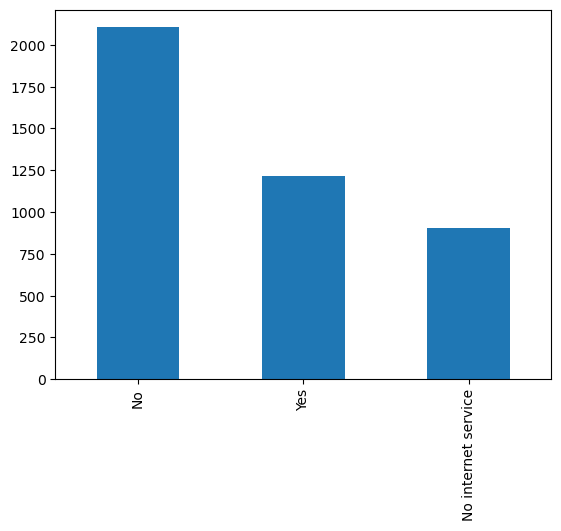


ONLINE_BACKUP
No                     1853
Yes                    1466
No internet service     906
Name: online_backup, dtype: int64
No                     0.438580
Yes                    0.346982
No internet service    0.214438
Name: online_backup, dtype: float64


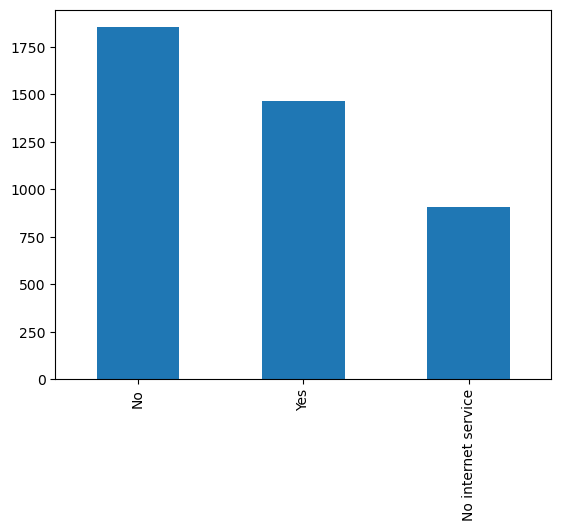


DEVICE_PROTECTION
No                     1860
Yes                    1459
No internet service     906
Name: device_protection, dtype: int64
No                     0.440237
Yes                    0.345325
No internet service    0.214438
Name: device_protection, dtype: float64


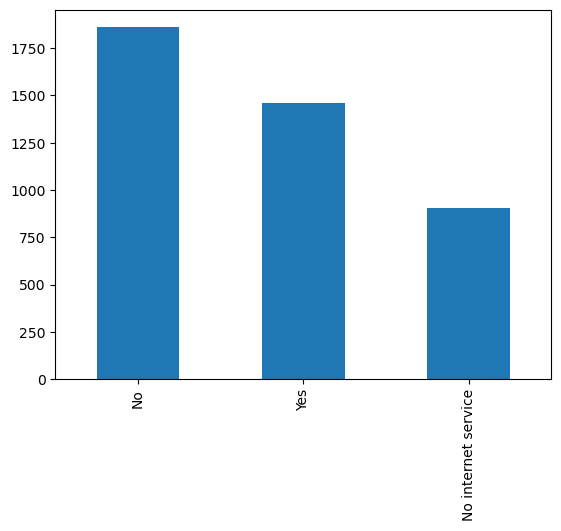


TECH_SUPPORT
No                     2072
Yes                    1247
No internet service     906
Name: tech_support, dtype: int64
No                     0.490414
Yes                    0.295148
No internet service    0.214438
Name: tech_support, dtype: float64


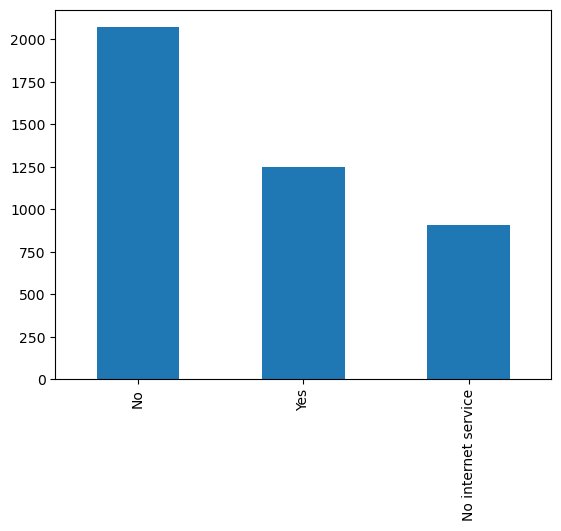


STREAMING_TV
Yes                    1675
No                     1644
No internet service     906
Name: streaming_tv, dtype: int64
Yes                    0.396450
No                     0.389112
No internet service    0.214438
Name: streaming_tv, dtype: float64


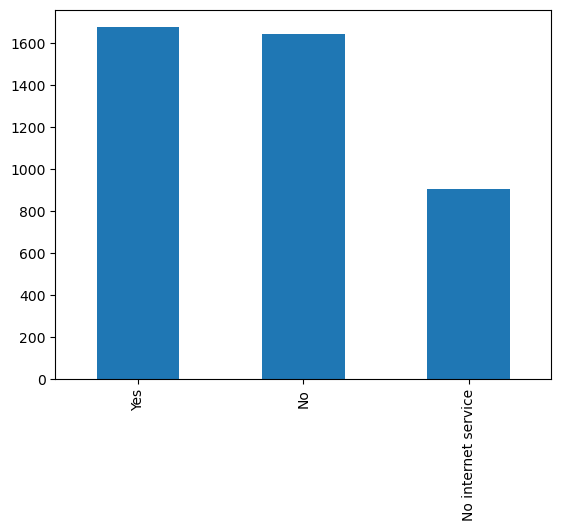


STREAMING_MOVIES
Yes                    1668
No                     1651
No internet service     906
Name: streaming_movies, dtype: int64
Yes                    0.394793
No                     0.390769
No internet service    0.214438
Name: streaming_movies, dtype: float64


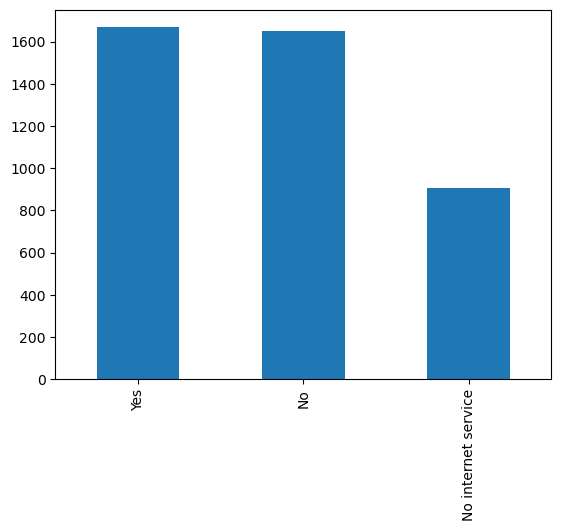


CONTRACT_TYPE
Month-to-month    2318
Two year          1039
One year           868
Name: contract_type, dtype: int64
Month-to-month    0.548639
Two year          0.245917
One year          0.205444
Name: contract_type, dtype: float64


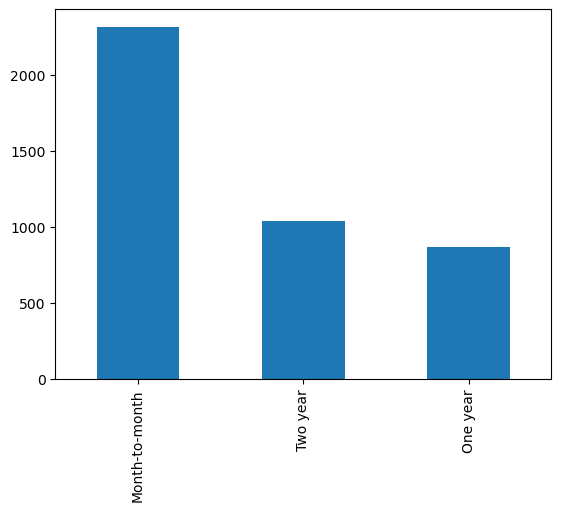


PAPERLESS_BILLING
Yes    2553
No     1672
Name: paperless_billing, dtype: int64
Yes    0.60426
No     0.39574
Name: paperless_billing, dtype: float64


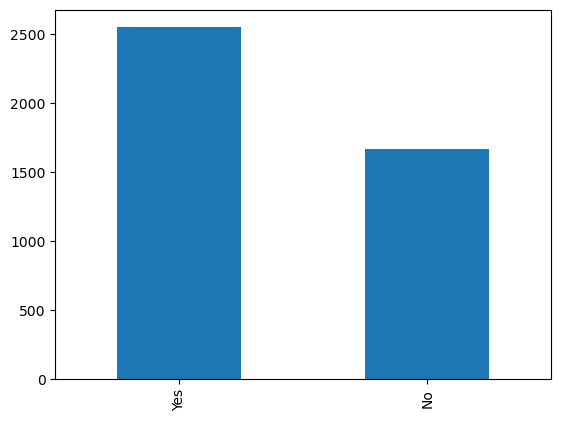


PAYMENT_TYPE
Electronic check             1405
Mailed check                  951
Bank transfer (automatic)     944
Credit card (automatic)       925
Name: payment_type, dtype: int64
Electronic check             0.332544
Mailed check                 0.225089
Bank transfer (automatic)    0.223432
Credit card (automatic)      0.218935
Name: payment_type, dtype: float64


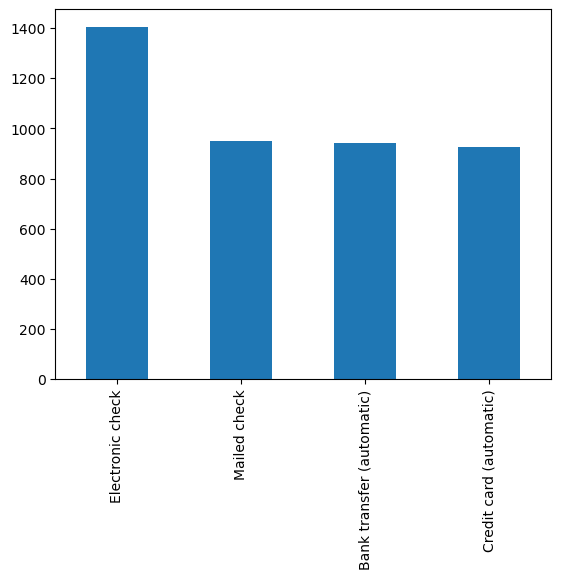


CHURN
No     3104
Yes    1121
Name: churn, dtype: int64
No     0.734675
Yes    0.265325
Name: churn, dtype: float64


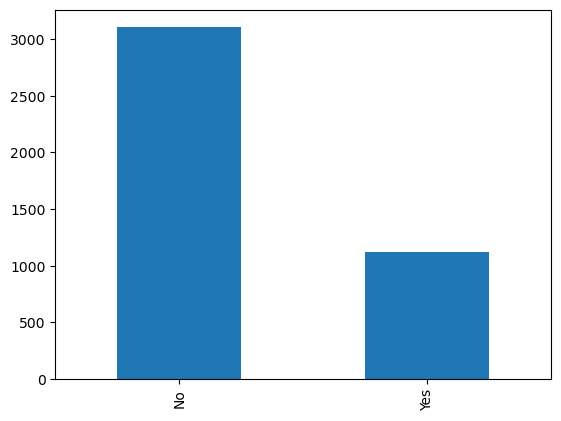

In [45]:
for col in col_cats:
    print (col.upper())
    print (ne_train[col].value_counts())
    print (ne_train[col].value_counts(normalize=True))
    ne_train[col].value_counts().plot.bar()
    plt.show()
    print()

### numeric variables

TENURE
1     382
72    226
2     141
3     120
4     107
     ... 
59     34
47     33
36     31
44     25
0       8
Name: tenure, Length: 73, dtype: int64


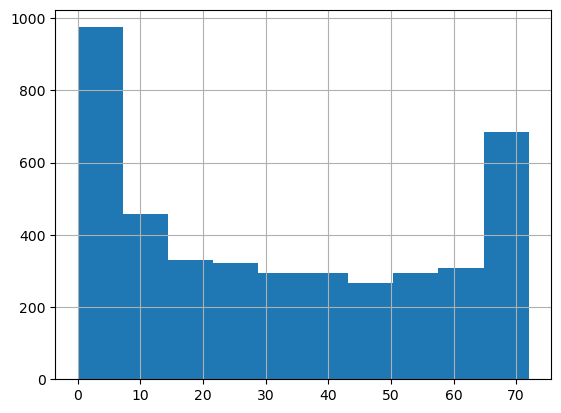


MONTHLY_CHARGES
20.05     35
19.90     30
19.75     30
19.60     28
19.65     27
          ..
71.95      1
57.50      1
51.25      1
113.30     1
39.40      1
Name: monthly_charges, Length: 1369, dtype: int64


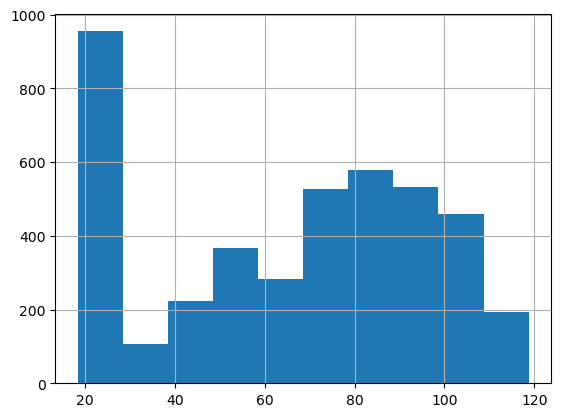


TOTAL_CHARGES
20.20      9
0.00       8
19.75      7
20.05      7
19.55      6
          ..
1943.20    1
5125.75    1
309.40     1
6330.40    1
5680.90    1
Name: total_charges, Length: 3998, dtype: int64


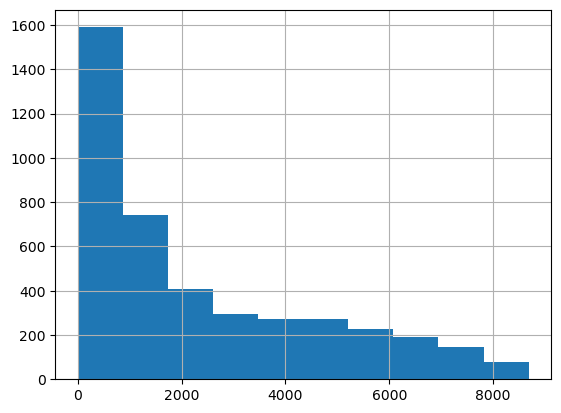

In [46]:
for col in num_cats:
    print(col.upper())
    print(ne_train[col].value_counts())
    ne_train[col].hist()
    plt.show()
    print()